In [2]:
# from nltk.classify import NaiveBayesClassifier
# from nltk.corpus import subjectivity
# from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import importlib
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS



from src.utils import keywords
from src.utils import analysis_tools
from src.scripts import filters

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leoga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def print_sentiment(sentences):
    for sentence in sentences:
        sia = SentimentIntensityAnalyzer()
        print(sentence)
        ss = sia.polarity_scores(sentence)['compound']
        print(ss)



In [4]:
path_final_yt_metadata = 'data/matching_videos.csv'
meta_data_df = pd.read_csv(path_final_yt_metadata)

meta_data_df.head(1)

categories                channel_id                  crawl_date  \
0  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:23.560250   

                                         description dislike_count  \
0  There has been a lot of emotional reaction to ...           0.0   

    display_id duration like_count           tags  \
0  BFlU3b68aNs       60        3.0  politics,news   

                                               title          upload_date  \
0  Online reaction swift after Georgia House pass...  2019-03-29 00:00:00   

   view_count  
0       401.0

In [5]:
def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)['compound']
    return score


In [6]:
meta_data_df["sentiment"] = meta_data_df["title"].apply(vader_sentiment)

In [7]:
meta_data_df.head()

categories                channel_id                  crawl_date  \
0  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:23.560250   
1  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:25.961967   
2  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:28.406280   
3  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:30.764228   
4  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:24.684348   

                                         description dislike_count  \
0  There has been a lot of emotional reaction to ...           0.0   
1  The measure outlaws abortions after 6 weeks. I...           2.0   
2  The bear has been spotted by several resident'...           0.0   
3  The former X-Factor contestant moved to Atlant...           1.0   
4  A yummy springtime spread with "Skinny Souther...           0.0   

    display_id duration like_count  \
0  BFlU3b68aNs       60        3.0   
1  rbBK6syU-fY      259       31.0   
2  u5pwbK0_E0c      769        7.0   
3  qUPXnZseiTc      167       34.0   
4  1JvFjfzlbE8      359        1.0   

                                                tags  \
0                                      politics,news   
1                                      politics,news   
2                            animals,local,news,life   
3      the-a-scene,entertainment,television,programs   
4  atlanta-and-company,entertainment,features,rec...   

                                               title          upload_date  \
0  Online reaction swift after Georgia House pass...  2019-03-29 00:00:00   
1              Georgia House passes 'heartbeat bill'  2019-03-29 00:00:00   
2  'Buckhead Bear' spotted rummaging through back...  2019-03-29 00:00:00   
3  Behind the sound: Simone Torres on recording i...  2019-03-29 00:00:00   
4             Springtime Spread with Lara Lyn Carter  2019-03-29 00:00:00   

   view_count  sentiment  
0       401.0     0.2023  
1       916.0     0.0000  
2       116.0     0.0000  
3      2521.0     0.0000  
4        41.0     0.0000

In [8]:
meta_data_df.to_csv('matching_videos_sentimet.csv')

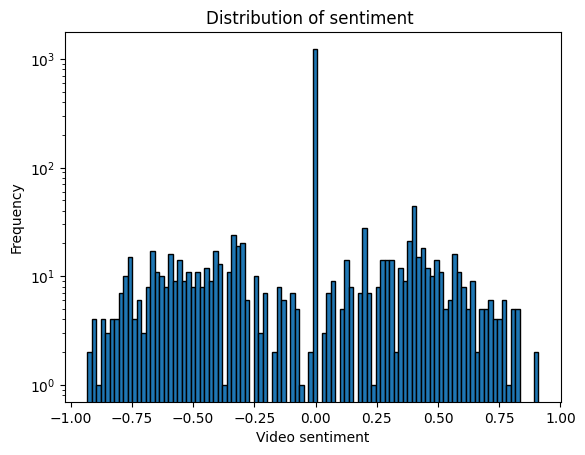

In [9]:
plt.hist(meta_data_df["sentiment"], bins= 100, edgecolor='black')
plt.xlabel('Video sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of sentiment ')
plt.yscale('log')
plt.show()

In [10]:
path_final_time = 'data/df_timeseries_en.tsv'
time_df = pd.read_csv(path_final_time,sep='\t')

time_df.head()

channel            category             datetime  \
0  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-03 00:00:00   
1  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-10 00:00:00   
2  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-17 00:00:00   
3  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-24 00:00:00   
4  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-31 00:00:00   

          views    delta_views         subs  delta_subs  videos  delta_videos  \
0  2.024946e+05       0.000000   650.222222    0.000000       5             0   
1  3.940857e+05  191591.111111  1046.000000  395.777778       6             1   
2  8.353938e+05  441308.083333  1501.500000  455.500000       6             0   
3  1.104577e+06  269183.250000  1750.000000  248.500000       6             0   
4  1.284406e+06  179828.600000  2008.300000  258.300000       6             0   

   activity  
0         3  
1         1  
2         1  
3         0  
4         0

In [11]:
news_time_df = time_df[time_df['category'] == "News & Politics"]

In [12]:
news_time_df.head(2)


channel         category             datetime  \
8808  UCJeZHwcNy0QXxj21FgrJFlg  News & Politics  2016-08-08 00:00:00   
8809  UCJeZHwcNy0QXxj21FgrJFlg  News & Politics  2016-08-15 00:00:00   

           views  delta_views     subs  delta_subs  videos  delta_videos  \
8808  474324.625    15615.625  235.875       0.000      66             0   
8809  495406.500    21081.875  250.500      14.625      69             3   

      activity  
8808         2  
8809         4

In [13]:
news_time_df['datetime'] = pd.to_datetime(news_time_df['datetime'])
news_time_df['year_month'] = news_time_df['datetime'].dt.to_period('M')
monthly_views = news_time_df.groupby('year_month')['views'].sum()
print(monthly_views)

year_month
2015-10    2.761761e+07
2015-11    7.117534e+07
2015-12    7.044476e+07
2016-01    9.097917e+07
2016-02    6.299504e+08
2016-03    1.751391e+09
2016-04    4.070584e+09
2016-05    1.205148e+10
2016-06    1.578078e+10
2016-07    2.189957e+10
2016-08    3.657198e+10
2016-09    3.373940e+10
2016-10    2.060458e+11
2016-11    2.260413e+11
2016-12    2.349439e+11
2017-01    3.084689e+11
2017-02    2.557851e+11
2017-03    2.652253e+11
2017-04    2.758086e+11
2017-05    3.597560e+11
2017-06    3.007317e+11
2017-07    3.900961e+11
2017-08    3.250100e+11
2017-09    3.378099e+11
2017-10    4.398353e+11
2017-11    3.672252e+11
2017-12    4.767685e+11
2018-01    4.041555e+11
2018-02    4.183356e+11
2018-03    4.359102e+11
2018-04    5.714526e+11
2018-05    4.793259e+11
2018-06    4.974776e+11
2018-07    6.497326e+11
2018-08    5.465354e+11
2018-09    5.702375e+11
2018-10    7.416968e+11
2018-11    6.150427e+11
2018-12    7.982073e+11
2019-01    6.610638e+11
2019-02    6.837178e+11
2019-

C:\Users\leoga\AppData\Local\Temp\ipykernel_19664\3032848107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_time_df['datetime'] = pd.to_datetime(news_time_df['datetime'])
C:\Users\leoga\AppData\Local\Temp\ipykernel_19664\3032848107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_time_df['year_month'] = news_time_df['datetime'].dt.to_period('M')


Text(0, 0.5, 'delta Views')

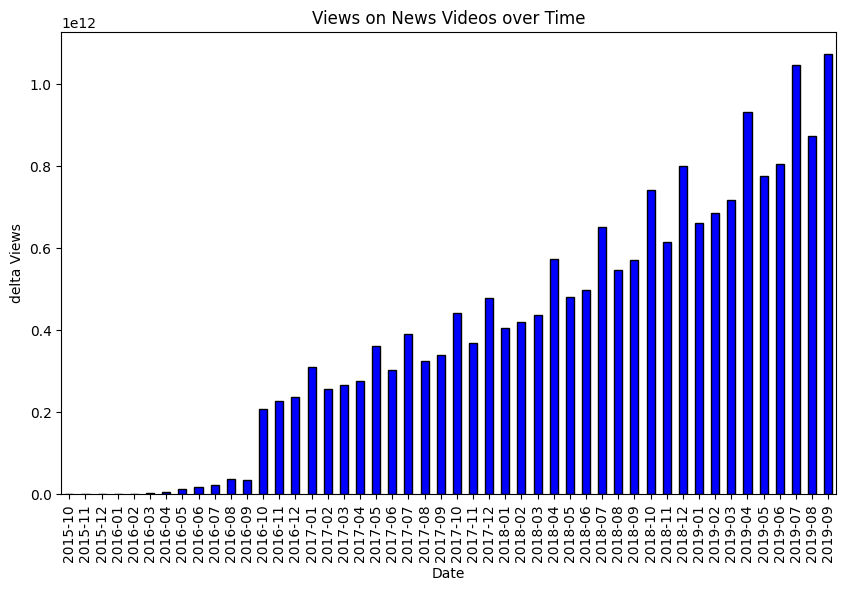

In [14]:
plt.figure(figsize=(12, 6))  # Set the figure size
# plt.plot(monthly_views.index, monthly_views.values, linestyle='-', color='b')
monthly_views.plot(kind='bar', figsize=(10, 6), color='b', edgecolor='black')
# Customize the plot
plt.title('Views on News Videos over Time')
plt.xlabel('Date')
plt.ylabel('delta Views')


In [15]:
path_channel = 'data/df_channels_en.tsv'
channel_df = pd.read_csv(path_channel,sep='\t')

channel_df.head()

category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087

In [16]:
import plotly.graph_objects as go

fig = px.pie(channel_df, values='videos_cc', names='category_cc', title='YouTube videos by category')
fig.show()
#fig.write_html("videos_by_cat.html")

In [23]:
def plot_word_cloud(video_text):
    video_text= str.split(video_text.to_string(index=False))
    video_text= pd.Series(video_text)
        #filtering
    stop_words = set(STOPWORDS)
    filtered = [token for token in video_text if token.lower() not in stop_words]
    filtered = pd.Series(filtered)
    filtered = filtered.str.replace('.','')
    filtered = filtered.str.lower() #remove duplicates with different capitalisation
    filtered = filtered[filtered.str.len() > 1] #remove prepostion
    comment_words = ''
    
    # iterate through the csv file
    for val in filtered:
        
        # typecaste each val to string
        val = str(val)
        if(str.isascii(val)):
            # split the value
            tokens = val.split()
            comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stop_words,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


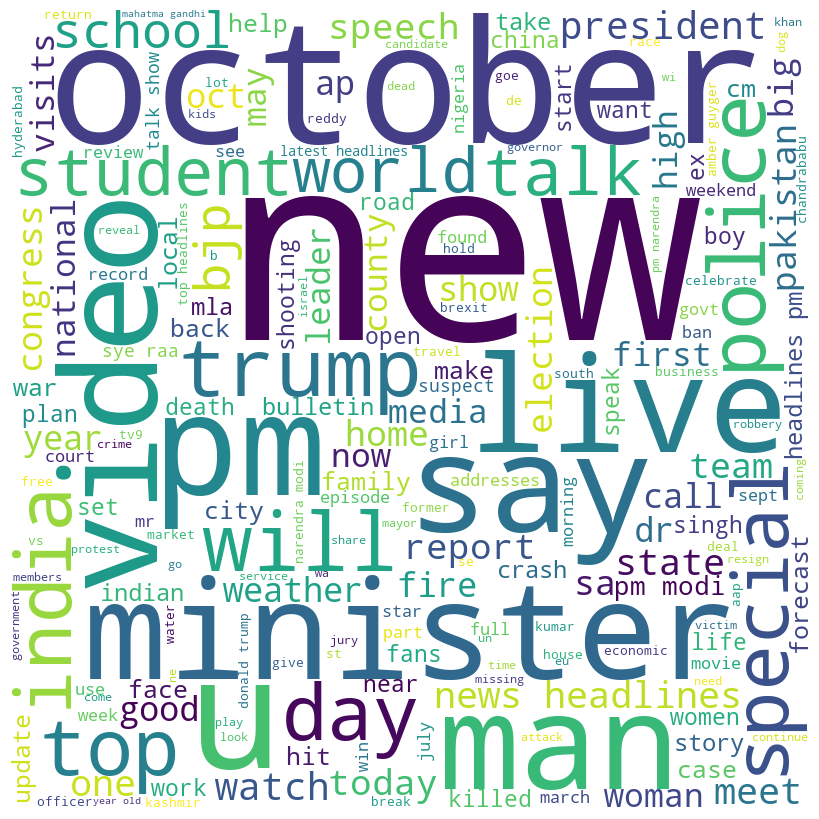

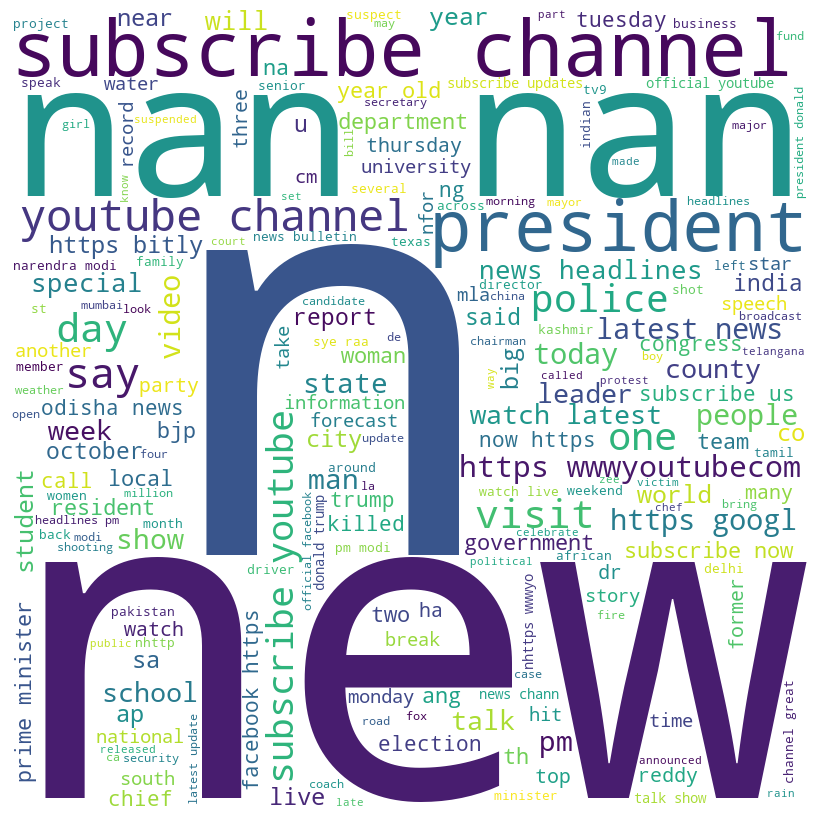

In [24]:
plot_word_cloud(meta_data_df["title"])
plot_word_cloud(meta_data_df["description"])


In [25]:
fig = make_subplots(rows=1, cols=2, subplot_titles=["Correlation Coefficients", "p-values"], horizontal_spacing = 0.2)

fig.update_layout(autosize=False,title="Correlation Matrix of Video Features and Response Metrics", title_x=0.5, title_y=0.9, height=600, width=1400)

list_of_events = ['Event 0', 'Event 1', 'Event 2', 'Event 3', 'Event 4', 'Event 5', 'Event 6', 'Event 7', 'Event 8', 'Event 9', 'Event 10', 'Event 11']

buttons = []
buttons2 = []

for i in range(len(list_of_events)):
    text = np.round(correlations[i][len(x_labels):,:len(x_labels)], 2).astype(str)
    fig.add_trace(go.Heatmap(z=correlations[i][len(x_labels):,:len(x_labels)], x=x_labels, y=y_labels, colorscale='RdYlBu', 
                             colorbar={"title":"Correlation <br> coefficient", 'x':0.42}, hovertemplate = "Correlation coefficient: %{z:.2f}<extra></extra>"),
                                row=1, col=1)
    
    fig.add_trace(go.Heatmap(z=pvalues[i][len(x_labels):,:len(x_labels)], x=x_labels, y=y_labels, colorscale='YlGnBu', colorbar={"title":"p-value"},
                  hovertemplate = "p-value: %{z:.2f}<extra></extra>"), row=1, col=2)
    
    buttons.append(dict(args=[{'visible': [False]*i*2+ [True]*2 + [False]*(len(list_of_events)-i-1)*2}], label=list_of_events[i], method="update"))
    
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list(buttons),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0,
            xanchor="right",
            y=1.15,
            yanchor="top"
        )
    ],
    hovermode='x'
)

fig.show(scrollZoom=False)

NameError: name 'make_subplots' is not defined